<a href="https://colab.research.google.com/github/Raunak22-Dev/ShadowFox-Intership/blob/main/Intermediate_Level_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

import chardet
file_path = '/content/drive/MyDrive/Shadow_Fox/Sample - Superstore.csv'

# Detect file encoding (optional)
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv(file_path, encoding=encoding)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [31]:
# Convert date columns
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

# Extract year for modeling
data["Ship_year"] = data["Ship Date"].dt.year

# Drop unnecessary columns
data.drop(["Customer Name", "Country", "Order ID", "Customer ID", "Product ID"], axis=1, inplace=True)



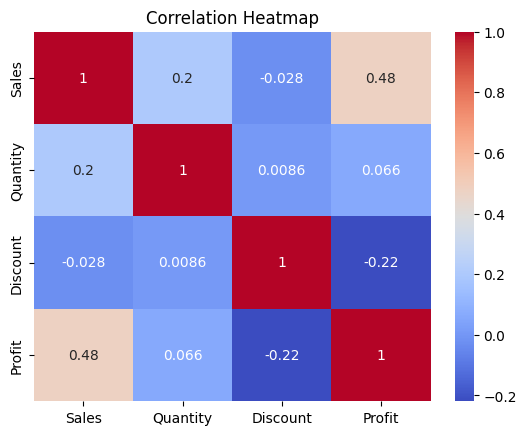

In [32]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [33]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = labelencoder.fit_transform(data[col])


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(["Profit", "Order Date", "Ship Date"], axis=1)
y = data["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results[name] = {
        "R2 Score": r2_score(y_test, preds),
        "MSE": mean_squared_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds))
    }

# Display results
for name, score in results.items():
    print(f"\n📌 {name}:")
    print(f"   R² Score: {score['R2 Score']:.4f}")
    print(f"   MSE     : {score['MSE']:.2f}")
    print(f"   RMSE    : {score['RMSE']:.2f}")



📌 Linear Regression:
   R² Score: -0.7104
   MSE     : 82928.78
   RMSE    : 287.97

📌 Ridge Regression:
   R² Score: -0.7102
   MSE     : 82918.97
   RMSE    : 287.96

📌 Lasso Regression:
   R² Score: -0.7092
   MSE     : 82872.92
   RMSE    : 287.88

📌 Random Forest:
   R² Score: -0.2215
   MSE     : 59224.02
   RMSE    : 243.36

📌 KNN Regressor:
   R² Score: -0.3924
   MSE     : 67508.43
   RMSE    : 259.82


###Making the model using Pytorch

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert data to NumPy arrays
X_np = X.values.astype(np.float32)
y_np = y.values.astype(np.float32).reshape(-1, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.3, random_state=2)

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)

X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)

# Define a simple regression model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.linear1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.linear1(x))
        return self.linear2(x)

# Instantiate the model
model = RegressionModel(X_train.shape[1])

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = criterion(predictions, y_test_tensor)
    print(f"\nTest MSE: {mse.item():.4f}")
    r2 = 1 - mse.item() / np.var(y_test)
    print(f"R² Score: {r2:.4f}")



Epoch [20/200], Loss: 0.6963
Epoch [40/200], Loss: 0.4846
Epoch [60/200], Loss: 0.2697
Epoch [80/200], Loss: 0.1850
Epoch [100/200], Loss: 0.1367
Epoch [120/200], Loss: 0.1102
Epoch [140/200], Loss: 0.0932
Epoch [160/200], Loss: 0.0807
Epoch [180/200], Loss: 0.0720
Epoch [200/200], Loss: 0.0653

Test MSE: 0.1440
R² Score: 0.8285
